Confusion Matrix:
 [[4 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         1

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



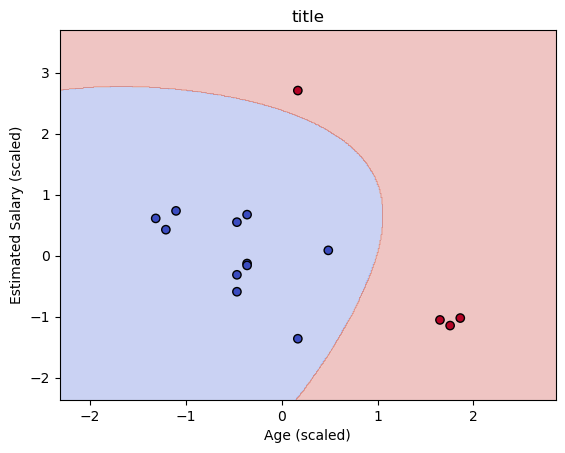

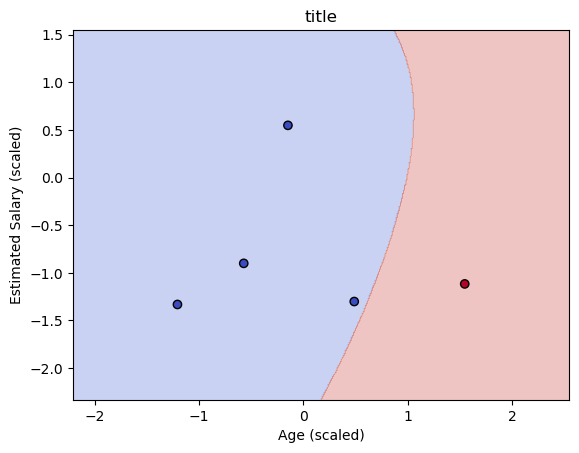

In [6]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Step 2: Load data
df = pd.read_csv('Social_Network_Ads.csv')
df = df[['Age', 'EstimatedSalary', 'Purchased']]
                 
# Step 3: Separate X (features) and y (target)
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Step 4: Split data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train the kernelized SVM (RBF kernel)
model = SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train_scaled, y_train)

# Step 7: Evaluate on the test set
y_pred = model.predict(X_test_scaled)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
      
# Step 8: create the plot_decision_boundary function to draw the SVM decision regions and the data points
def plt_decision_boundary(X, y, model, title):
    h = 0.01 # Step Size
    # 1. Determine the limits of the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  
    # 2. Create a meshgrid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # 3. Predict the class for every point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # 4. Plot filled decision regions (red vs blue)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    # 5. Overlay the actual data point (colored by true label)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title('title')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.show()
    
# Step 9: Visualize decision boundary for both training and test sets
plt_decision_boundary(X_train_scaled, y_train, model, "SVM Decision Boundary (Train Set)")
plt_decision_boundary(X_test_scaled, y_test, model, "SVM Decision Boundary (Test Set)")